In [1]:
# location=> https://mitu.co.in/dataset
# dataset=> Social_Network_Ads.csv

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [4]:
df.shape

(400, 5)

In [5]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [7]:
# separate input and output

In [8]:
x = df[['Age', 'EstimatedSalary']]
y = df['Purchased']

In [9]:
y.value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

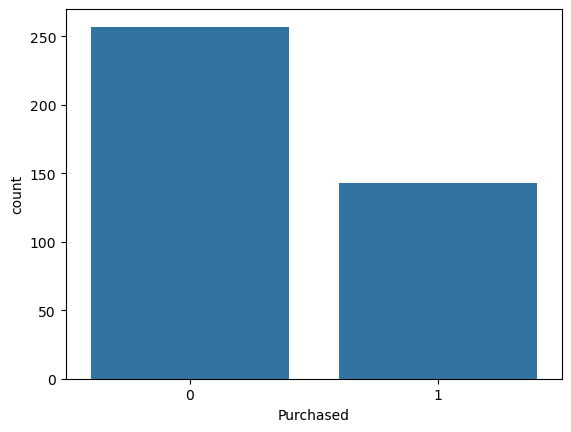

In [10]:
import seaborn as sns
sns.countplot(x = y);

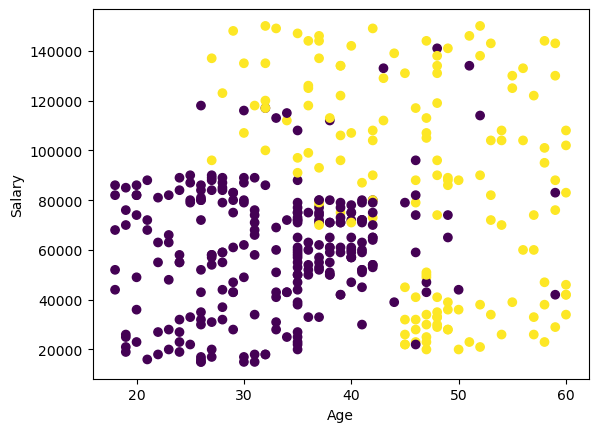

In [11]:
plt.xlabel('Age')
plt.ylabel('Salary')
plt.scatter(df['Age'], df['EstimatedSalary'], c = y);

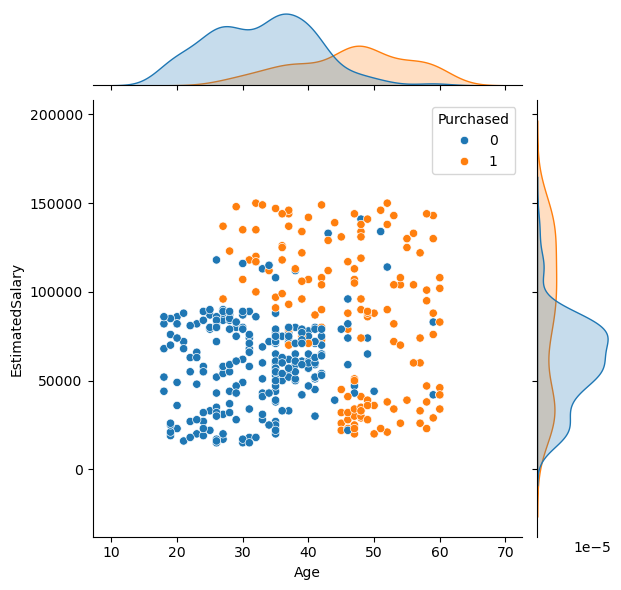

In [12]:
sns.jointplot(x = 'Age', y = 'EstimatedSalary', data = df, hue = 'Purchased');

In [13]:
x.describe()

,Age,EstimatedSalary
count,400.000000,400.000000
mean,37.655000,69742.500000
std,10.482877,34096.960282
min,18.000000,15000.000000
25%,29.750000,43000.000000
50%,37.000000,70000.000000
75%,46.000000,88000.000000
max,60.000000,150000.000000


##### feature scaling

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [16]:
pd.DataFrame(x_scaled).describe()

,0,1
count,400.000000,400.000000
mean,0.467976,0.405500
std,0.249592,0.252570
min,0.000000,0.000000
25%,0.279762,0.207407
50%,0.452381,0.407407
75%,0.666667,0.540741
max,1.000000,1.000000


#### cross validation

In [18]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y,
                                                   random_state= 0,
                                                   test_size= 0.25)

In [19]:
x_train.shape

(300, 2)

In [20]:
y_train.shape

(300,)

#### build the model

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
classifier = LogisticRegression()

In [24]:
classifier.fit(x_train, y_train)

LogisticRegression()

#### Evaluation

In [26]:
# predict on test set

y_pred = classifier.predict(x_test)

In [27]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

In [28]:
pd.DataFrame({
    'actual': y_test,
    'predicted': y_pred
})

,actual,predicted
132,0,0
309,0,0
341,0,0
196,0,0
246,0,0
...,...,...
146,1,0
135,0,0
390,1,0
264,1,1


In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, accuracy_score

In [30]:
y_test.value_counts()

Purchased
0    68
1    32
Name: count, dtype: int64

In [31]:
confusion_matrix(y_test, y_pred)

array([[67,  1],
       [10, 22]])

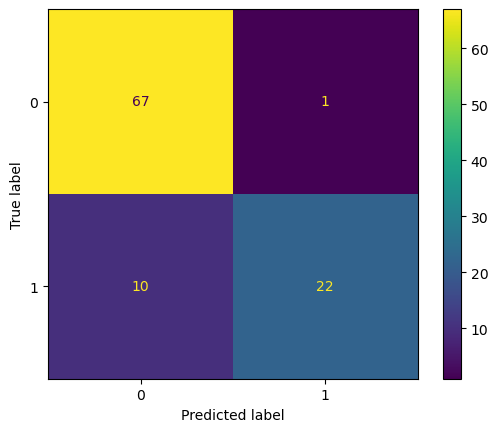

In [32]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [33]:
accuracy_score(y_test, y_pred)

0.89

In [64]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.92        68
           1       0.96      0.69      0.80        32

    accuracy                           0.89       100
   macro avg       0.91      0.84      0.86       100
weighted avg       0.90      0.89      0.88       100



In [80]:
# precision for 0
# out of all the predicted 0... how many were accurate
precision = 67/77
precision

0.8701298701298701

In [70]:
# precision for 1

22/23

0.9565217391304348

In [82]:
# recall for 0
# out of all the 0 in your data how many model was able to predict

recall = 67/68
recall

0.9852941176470589

In [74]:
# recall for 1
22/32

0.6875

In [86]:
# f1 score for 0
# harmonic mean between precision and recall

2 * precision * recall/ (precision + recall)

0.9241379310344828

#### predict on new values

In [89]:
new1 = [[45, 34000]]

In [91]:
classifier.predict(scaler.transform(new1))

/home/aditya/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([0])